# Absorption Spectra over Wavelengths Varying Silicon Thicknesses

In this example, we demonstrate absortion spectra over wavelengths varying silicon thicknesses for a Si/Ag structure. Note that crystalline silicon is used for a silicon layer.

First off, we import the packages required for this example.

In [1]:
import numpy as onp
import jax.numpy as jnp
import matplotlib.pyplot as plt

import jaxlayerlumos as jll
import jaxlayerlumos.utils_materials as jll_utils_materials
import jaxlayerlumos.utils_spectra as jll_utils_spectra
import jaxlayerlumos.utils_units as jll_utils_units

Frequencies and wavelengths are defined by using our package.

In [2]:
frequencies = jll_utils_spectra.get_frequencies_visible_light()
wavelengths = jll_utils_spectra.convert_frequencies_to_wavelengths(frequencies)

Then, a material layout is set as Air/cSi/Ag where cSi stands for crystalline silicon. For the material layout, we obtain ($n$, $k$) values. In addition, we define an incidence angle as 0$^\circ$.

In [3]:
materials = ['Air', 'cSi', 'Ag']
n_k = jll_utils_materials.get_n_k(materials, frequencies)

angle = jnp.array([0.0])

All thicknesses of silicon are from 10 nm to 1000 nm with 500 thickness samples. Then, we add thicknesses of 0 at the beginning and end of the thickness array.

In [4]:
silicon_thicknesses = jll_utils_units.convert_nm_to_m(jnp.linspace(10.0, 1000.0, 500))

all_thicknesses = jnp.concatenate([
    jnp.zeros((silicon_thicknesses.shape[0], 1)),
    silicon_thicknesses[..., jnp.newaxis],
    jnp.zeros((silicon_thicknesses.shape[0], 1)),
], axis=1)

Absorption spectra over wavelengths (or equivalently frequencies) are calculated using our package. To compute an absorption spectrum, we employ transmission and reflection spectra:
$$A = 1 - T - R,$$
where $A$ is an absorption spectrum, $T$ is a transmission spectrum, and $R$ is a reflection spectrum.

In [5]:
absorption_spectra = []

for thicknesses in all_thicknesses:
    R_TE, T_TE, R_TM, T_TM = jll.stackrt(n_k, thicknesses, frequencies, angle)

    R_TE_spec = jnp.squeeze(R_TE, axis=0)
    T_TE_spec = jnp.squeeze(T_TE, axis=0)
    R_TM_spec = jnp.squeeze(R_TM, axis=0)
    T_TM_spec = jnp.squeeze(T_TM, axis=0)

    R_avg = (R_TE_spec + R_TM_spec) / 2.0
    T_avg = (T_TE_spec + T_TM_spec) / 2.0

    absorption = 1.0 - R_avg - T_avg

    absorption_spectra.append(absorption)

absorption_spectra = onp.array(absorption_spectra)
X, Y = onp.meshgrid(wavelengths, onp.array(silicon_thicknesses))

Finally, absorption spectra over wavelengths are plotted, where $x$-axis is wavelengths and $y$-axis is silicon thicknesses.

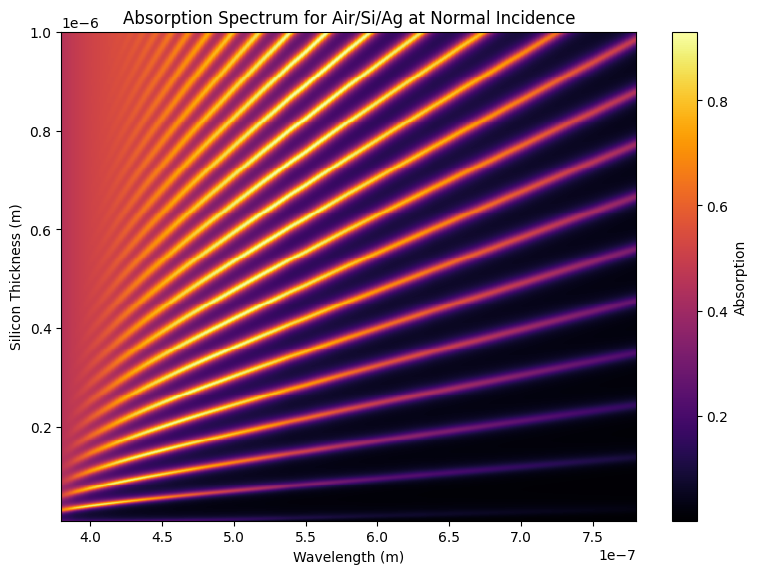

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()

mesh = ax.pcolormesh(X, Y, absorption_spectra, cmap='inferno')

fig.colorbar(mesh, label="Absorption")

ax.set_xlabel("Wavelength (m)")
ax.set_ylabel("Silicon Thickness (m)")
ax.set_title("Absorption Spectrum for Air/Si/Ag at Normal Incidence")

plt.tight_layout()
plt.show()